# Introduction
Nama    : Mohammad Dandy Goesti

Dataset : Airplane Passenger Satisfaction

Link Dashboard  : https://public.tableau.com/app/profile/m.dandy/viz/Milestone1_Dandy/AirplanePassengerSatisfaction?publish=yes


**Background**  

Sebagai Data Analyst saya mendapatkan sebuah projek dari client yang merupakan sebuah perusahaan maskapai penerbangan untuk menganalisa sebuah dataset yang telah mereka kumpulkan selama ini. Dataset tersebut berisi tingkat kepuasan penumpang terhadap servis yang mereka berikan. Dalam industri penerbangan yang sangat kompetitif dan cepat berubah, maskapai dituntut untuk dapat selalu mengatasi masalah dan meraih peluang yang ada. Salah satu faktornya yaitu level kepuasan penumpang atas servis yang diberikan oleh maskapai tersebut. Dengan ada nya dataset kepuasan penumpang terhadap servis maskapai, kesempatan untuk menganalisa terbuka lebar.

**Problem Statement** 
 
Project ini bertujuan untuk melakukan analisis data dari dataset Airplane Passenger Satisfaction yang diharapkan dapat menghasilkan insight berguna bagi maskapai. Dengan cara menganalisa variabel yang tersedia, seperti variable skor Satisfaction yang mempunyai rangking 0-3 sebagai Neutral or Disatisfied dan 4-5 sebagai Satisfied. Analisa ini akan dilakukan dengan program Python untuk membuat analisa deskriptif dan inferensial dan akan di visualisasikan menjadi Dashboard menggunakan Tableau. Projek analisa data ini akan selesai dalam waktu 3-4 hari dengan hasil pemahaman mendalam dari dataset, yang diharapkan dapat meningkatkan tingkat kepuasan penumpang terhadap maskapai. Hasil akhir nya akan berupa insight yang mana pengetahuan tersebut digunakan maskapai dalam mengambil keputusan, menganalisis tren, meningkatkan efisiensi, meningkatkan kepuasan penumpang dan mengembangkan perusahaan ke arah yang lebih baik. Maka dari itu saya akan menganalisa faktor-faktor yang berkaitan dalam mempengaruhi tingkat kepuasan penumpangan pesawat.

Penjabaran masalah untuk mengetahui faktor yang mempengaruhi kepuasan penumpang 

1. Rentang umur berapa yang menggunakan layanan maskapai?
2. Berapa distribusi satisfaction penumpang kepada maskapai?
3. Berapa komposisi gender yang menggunakan maskapai?
4. Berapakah jumlah orang yang memberikan skor pada Cleanliness dan detail dari tiap skornya?
5. Pengaruh Arrival delay time dan Departure delay time kepada kepuasan penumpang?
6. Berapakah jumlah rata-rata dan kecenderungan distribusi rating dari in flight service?
7. Adakah hubungan yang signifikan dari Inflight service dan Checkin service?
8. Apakah Class penumpang berhubungan terhadap satisfaction?

# Data Exploration and Cleaning

Dimulai dari Import Library yang dibutuhkan, kemudian data akan di load lalu di eksplorasi terlebih dahulu agar melihat isi data dan bisa menentukan langkah cleaning yang perlu dilakukan. 

In [1]:
# Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import cm
from matplotlib.pyplot import figure

In [2]:
# Membaca dataset
df=pd.read_csv("Airplane_Passenger_Satisfaction.csv")

In [3]:
# Melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Dari df.info kita melihat ada sekitar 25.976 rows dengan 25 columns

In [4]:
# Melihat 10 data teratas dari dataset
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [5]:
# Melihat basic description data
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [6]:
# Melihat nama columns 
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Kemudian karena pada dataset terdapat column 'unnamed' dan 'Id' yang saya rasa tidak diperlukan dan tidak relevan dengan problem statement, maka saya akan memilih variable faktor satisfaction kemudian menghapus kolom yang tidak dibutuhkan. Kemudian pada nama columns yang mempunyai spasi diantaranya akan ditambahkan juga underscore.

In [7]:
# Menggunakan columns.get_loc untuk mempermudah pencarian kolom yang ingin dihapus
df.columns.get_loc("id")

1

In [8]:
# Drop kolom yang tidak diingikan yaitu unnamed dan ID
df.drop(df.columns[[0, 1]], axis = (1), inplace=True)


In [9]:
# Menambah underscore diantara nama column
df.columns=df.columns.str.replace(" ","_")

In [10]:
# melihat shape dari dataframe yang baru
df.shape

(25976, 23)

In [11]:
# Melihat nama columns yang baru
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [12]:
# Mengecek datatypes
df.dtypes

Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti

Pada column Departure_Delay_in_Minutes dan Arrival_Delay_in_Minutes terdapat perbedaan tipe data yang mungkin akan mempengaruhi analisis maka Departure_Delay_in_Minutes akan dirubah menjadi float

In [13]:
# Merubah datatype Departure_Delay menjadi float
df['Departure_Delay_in_Minutes'] = df['Departure_Delay_in_Minutes'].astype(float)

In [14]:
# Menghitung missing values
df.isnull().sum()

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0
dtype: int64

Pada column Arrival_Delay_in_Minutes terdapat 83 missing values yang sangat kecil jika dibandingkan dengan jumlah data, untuk itu saya akan mengisi dengan value mean dari Arrival_Delay_in_Minutes.

In [15]:
# Memberi nilai Mean pada missing values di column Arrival_Delay_in_Minutes
df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean(),inplace=True)
df.head(5)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50.0,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0.0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0.0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0.0,20.0,satisfied


In [16]:
# Menghitung missing values kembali
df.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

Setelah di cek kembali missing values sudah 0 disemua columns

In [17]:
# Menghitung nilai unique value pada setiap column hanya untuk referensi
df.nunique()

Gender                                  2
Customer_Type                           2
Age                                    75
Type_of_Travel                          2
Class                                   3
Flight_Distance                      3281
Inflight_wifi_service                   6
Departure/Arrival_time_convenient       6
Ease_of_Online_booking                  6
Gate_location                           5
Food_and_drink                          6
Online_boarding                         6
Seat_comfort                            5
Inflight_entertainment                  6
On-board_service                        6
Leg_room_service                        6
Baggage_handling                        5
Checkin_service                         5
Inflight_service                        6
Cleanliness                             6
Departure_Delay_in_Minutes            313
Arrival_Delay_in_Minutes              321
satisfaction                            2
dtype: int64

In [18]:
# Melihat semua 23 columns 
pd.set_option('display.max_columns',23)

In [19]:
# Melihat semua 23 columns 
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50.0,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0.0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0.0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0.0,20.0,satisfied


In [20]:
#menyimpan data ke csv baru
df.to_csv('Airplane_Passenger_Satisfaction_Cleaned.csv', index=False)
print('Data Tersimpan')

Data Tersimpan


In [21]:
# Membaca dataset format csv yang sudah di simpan sebelumnya dengan p.read_csv
df = pd.read_csv('Airplane_Passenger_Satisfaction_Cleaned.csv')

In [22]:
# Melihat info dari data frame baru
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer_Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type_of_Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight_Distance                    25976 non-null  int64  
 6   Inflight_wifi_service              25976 non-null  int64  
 7   Departure/Arrival_time_convenient  25976 non-null  int64  
 8   Ease_of_Online_booking             25976 non-null  int64  
 9   Gate_location                      25976 non-null  int64  
 10  Food_and_drink                     25976 non-null  int64  
 11  Online_boarding                    25976 non-null  int

Pada tahap data exploraton dan cleaning ini, hasil final dataset terdapat 23 columns dan 25976 rows dengan 83 missing values yang sudah dihandle dan juga telah merubah data tipe column Arrival_Delay_in_Minutes menjadi float. Menurut saya sekarang data sudah cukup siap untuk proses selanjutnya, yaitu Analisis data.

# Analisis Data

Untuk analisa pertama saya ingin tahu rentang usia berapa yang paling banyak dan paling sedikit menggunakan layanan maskapai. Ini bisa diketahui dengan menghitung distribusi Age penumpang.

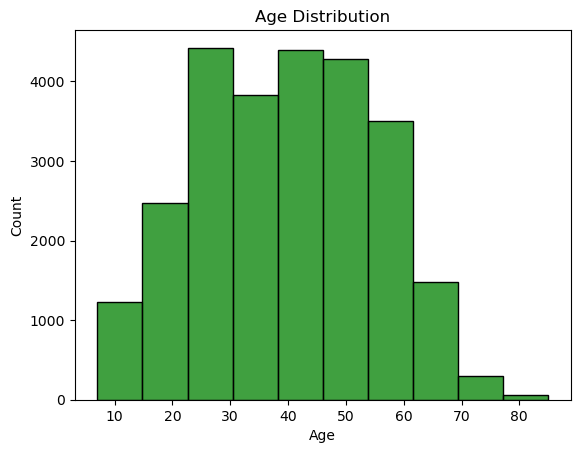

In [23]:
# menggunakan seaborn histplot untuk membuat histogram
sns.histplot(df.Age, bins=10, color='green')
plt.title("Age Distribution")
plt.show()

dari histogram diatas bisa diketahui bahwa range passengers age paling tinggi adalah 20-30, kemudian 40-50 dan 50-60. Dan paling rendah adalah 70-80 dan 0-10. Rentang Usia 20-50 mendominasi distribusi data, ini termasuk wajar karena jika mengacu pada realita nya usia tersebut masuk kedalam usia produktif dimana banyak penumpang yang bepergian untuk urusan pekerjaan, liburan dan lainnya.

Sebagai faktor utama atas ulasan penumpang, penting untuk mengetahui berapa distribusi satisfaction penumpang kepada layanan maskapai. Hasil ini akan memberi gambaran kepada maskapai untuk meningkatkan layanan mereka.

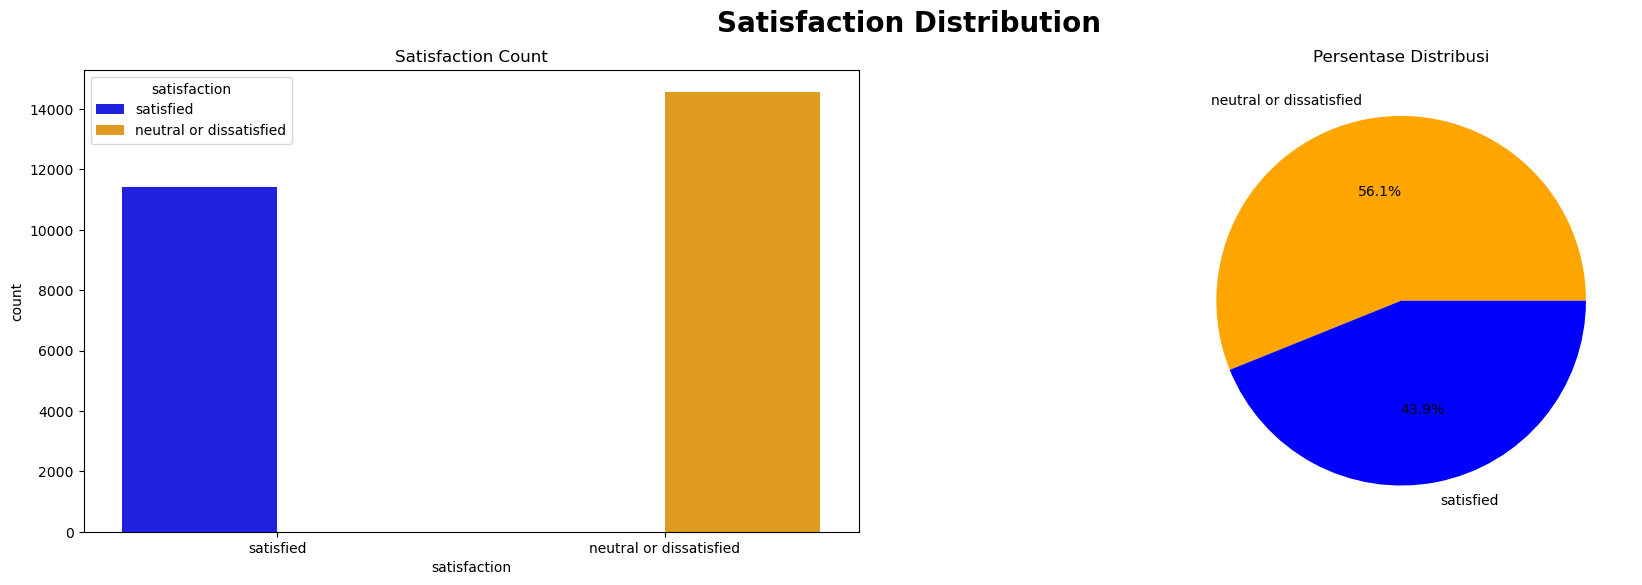

In [24]:
# Untuk memberi warna pada chart kita mendefine dulu target colors
target_colors1=['blue','orange']
target_colors2=['orange','blue']

# Membuat kotak dasar untuk chart
fig=plt.figure(figsize=(22,6))
plt.suptitle('Satisfaction Distribution',weight='bold',fontsize=20)
grid=gridspec.GridSpec(nrows=1,ncols=2,figure=fig)

# Membuat bar chart berisi count
ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count')
# menggunakan seaborn untuk meggambar chart
sns.countplot(x='satisfaction', data=df,ax=ax1,hue='satisfaction',palette=target_colors1)

# mencoba membuat pie chart untuk melihat komposisi data satisfaction
ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Persentase Distribusi')
# memasukkan perhitungan values counts satisfaction kedalam index 
label=list(df['satisfaction'].value_counts().index)
value=list(df['satisfaction'].value_counts().values)

# Membuat pie chart
ax2.pie(value,labels=label,autopct='%1.1f%%',colors=target_colors2)
# menunjukkan chart yang sudah dibuat
plt.show()

In [25]:
# Melihat total value satisfaction dan dissatisfaction
list(df['satisfaction'].value_counts().values)

[14573, 11403]

Distribusi Kepuasan penumpang bisa dilihat pada Bar chart dan pie chart diatas. 
Sekitar 14.573 penumpang menyatakan netral/dissatisfied dan 11.403 penumpang menyatakan satisfied kepada layanan maskapai. 
Pada pie chart kita juga bisa melihat persentase distribusi yaitu 56.1% penumpang neutral or dissatisfied dan 43.9% menyatakan satisfied. 
Hasil ini mungkin bisa juga disebabkan banyak penumpang yang tidak mengisi survey sehingga terinput 0 menyebabkan status netral yang kemudian disatukan ke status dissatisfied dalam dataset. Secara Garis besar pengguna pesawat masih cenderung tidak puas dengan layanan dari maskapai.

Kemudian saya penasaran apakah tipe Gender berpengaruh dengan keputusan untuk menggunakan maskapai dari client saya atau ada gender yang tidak suka menggunakan maskapai ini? mari kita lihat komposisi gender pada pengguna pesawat.

In [26]:
# Menghitung berapa total distribusi gender pada maskapai
df['Gender'].value_counts()

Gender
Female    13172
Male      12804
Name: count, dtype: int64

In [27]:
# Menghitung Persentasei Gender pada maskapai
Gender_percentage=dict((df['Gender'].value_counts()/df.shape[0])*100)
print('Distribution of Genders:\n')
print('Females: {Female}%  \nMales: {Male}% '.format(Female="{:.2f}".format(Gender_percentage['Female']),
Male="{:.2f}".format(Gender_percentage['Male'])))

Distribution of Genders:

Females: 50.71%  
Males: 49.29% 


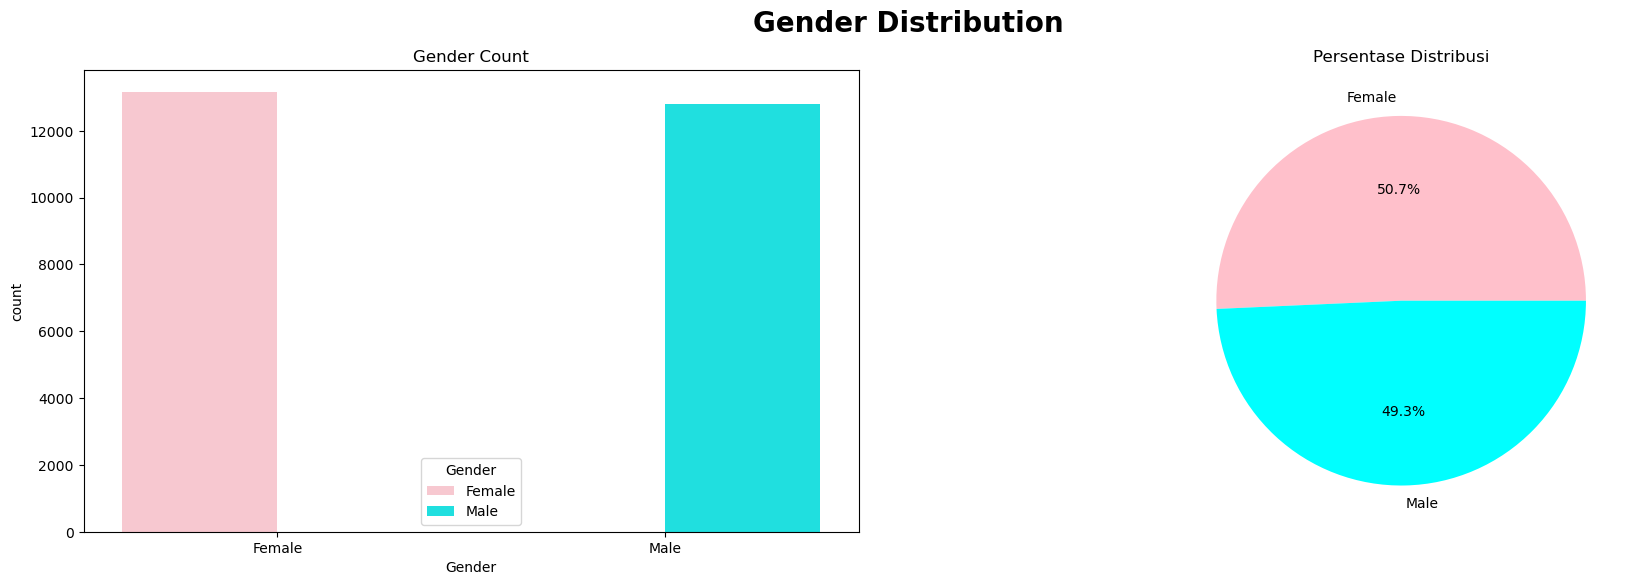

In [28]:
# Untuk memberi warna pada chart kita mendefine dulu target colors
target_colors3=['pink','cyan']
target_colors4=['pink','cyan']

# Membuat kotak dasar untuk chart
fig=plt.figure(figsize=(22,6))
plt.suptitle('Gender Distribution',weight='bold',fontsize=20)
grid=gridspec.GridSpec(nrows=1,ncols=2,figure=fig)

# Membuat bar chart berisi count
ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Gender Count')
# menggunakan seaborn untuk meggambar chart
sns.countplot(x='Gender', data=df,ax=ax1,hue='Gender',palette=target_colors3)

# mencoba membuat pie chart untuk melihat komposisi data satisfaction
ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Persentase Distribusi')
# memasukkan perhitungan values counts satisfaction kedalam index 
label=list(df['Gender'].value_counts().index)
value=list(df['Gender'].value_counts().values)

# Membuat pie chart
ax2.pie(value,labels=label,autopct='%1.1f%%',colors=target_colors4)
# menunjukkan chart yang sudah dibuat
plt.show()

Dari chart diatas kita bisa melihat komposisi Gender yang menggunakan maskapai ini adalah 13.172 untuk Female passengers atau 50.71% dari total penumpang dan 12.084 untuk Male passengers atau 49.29% dari total penumpang. Perbedaannya tidak terlalu signifikan malah cenderung seimbang yang berarti maskapai ini secara umum dipakai dan tidak ada masalah terkait isu gender sehingga client bisa fokus kepada faktor lainnya.

Kemudian saya ingin mengetahui berapa orang yang mengisi rating pada column Cleanliness tiap rankingnya. Bisa dijabarkan dalam bentuk pertanyaan, berapakah jumlah orang yang memberikan skor pada column Cleanliness dan berapa distribusi tiap ratingnya?

In [35]:
# Menghitung jumlah rating pada satisfaction
values = df['Cleanliness'].value_counts(dropna=False).keys().tolist()
counts = df['Cleanliness'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))
for i in value_dict:
    print(f'Rating {i}: {value_dict[i]} Passengers')
    

Rating 4: 6790 Passengers
Rating 3: 6065 Passengers
Rating 5: 5727 Passengers
Rating 2: 3981 Passengers
Rating 1: 3411 Passengers
Rating 0: 2 Passengers


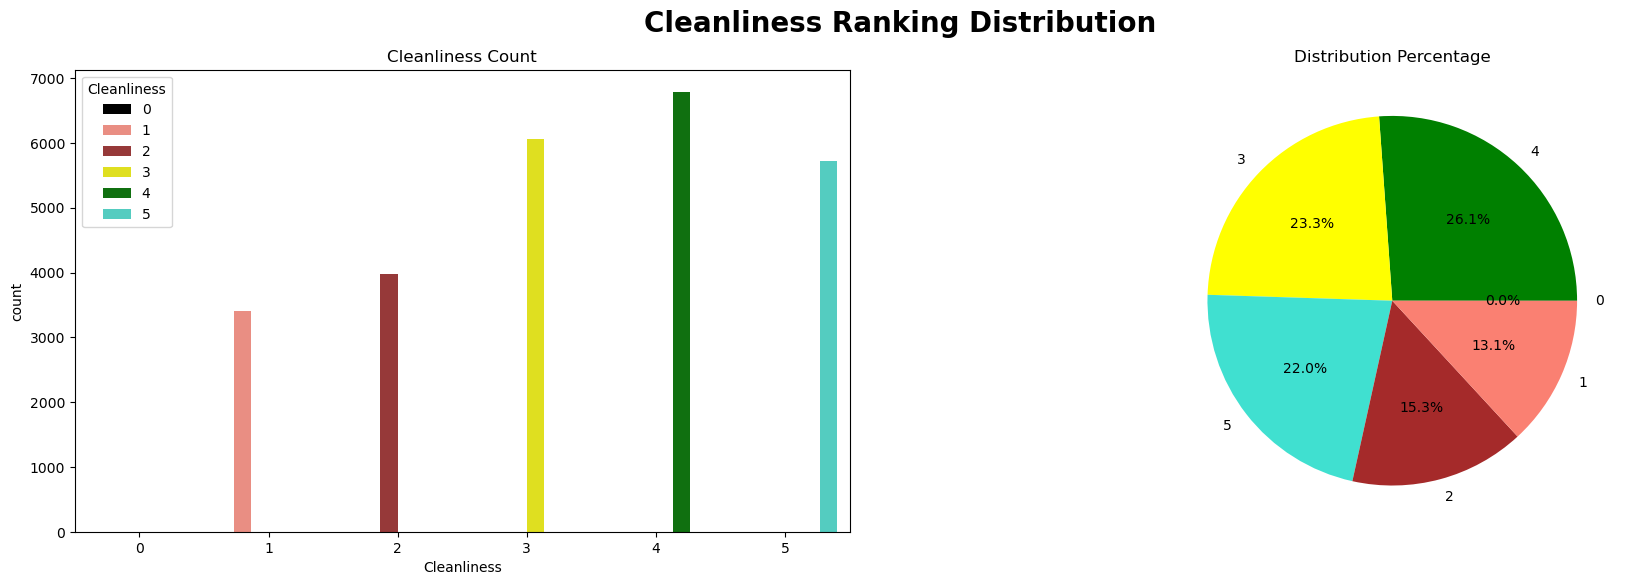

In [30]:
# Untuk memberi warna pada chart kita mendefine dulu target colors
target_colors5=['black','salmon', 'brown', 'yellow', 'green', 'turquoise']
target_colors6=['green','yellow', 'turquoise', 'brown', 'salmon', 'black']

# Membuat kotak dasar untuk chart
fig=plt.figure(figsize=(22,6))
plt.suptitle('Cleanliness Ranking Distribution',weight='bold',fontsize=20)
grid=gridspec.GridSpec(nrows=1,ncols=2,figure=fig)

# Membuat bar chart berisi count
ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Cleanliness Count')
# menggunakan seaborn untuk meggambar chart
sns.countplot(x='Cleanliness', data=df,ax=ax1,hue='Cleanliness',palette=target_colors5)

# mencoba membuat pie chart untuk melihat komposisi data satisfaction
ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Distribution Percentage')
# memasukkan perhitungan values counts satisfaction kedalam index 
label=list(df['Cleanliness'].value_counts().index)
value=list(df['Cleanliness'].value_counts().values)

# Membuat pie chart
ax2.pie(value,labels=label,autopct='%1.1f%%',colors=target_colors6)
# menunjukkan chart yang sudah dibuat
plt.show()

Dari chart diatas bisa dijelaskan hanya 2 orang yang memberi rating 0 atau hampir 0%, 3411(23,3%) passengers mengisi rating 1, 3981(15.3%) passengers mengisi rating 2, 6065(23.3%) passengers mengisi rating 3, 6790(26.1%) passengers mengisi rating 4 dan 5727(22.0%) passengers mengisi rating 5. Bisa disimpulkan bahwa secara garis besar passengers atau pengguna pesawat sudah cukup puas dengan tingkat Cleanliness yang diberikan maskapai. Walaupun mungkin masih bisa ditingkatkan dalam segi kebersihan agar kedepannya rating 1 dan 2 menjadi lebih kecil dan keseluruah skor akan meningkat

Dari segi keterlambatan waktu, saya ingin mengetahui bagaimana Distribusi Satisfaction berdasarkan waktu Delay? dalam hal ini terdapat Arrival_delay yaitu keterlambatan waktu kedatangan dan Departure_delay yaitu keterlambatan waktu keberangkatan. Waktu pada column ini dihitung dalam satuan menit yang akan dibandingkan dengan status satisfaction.

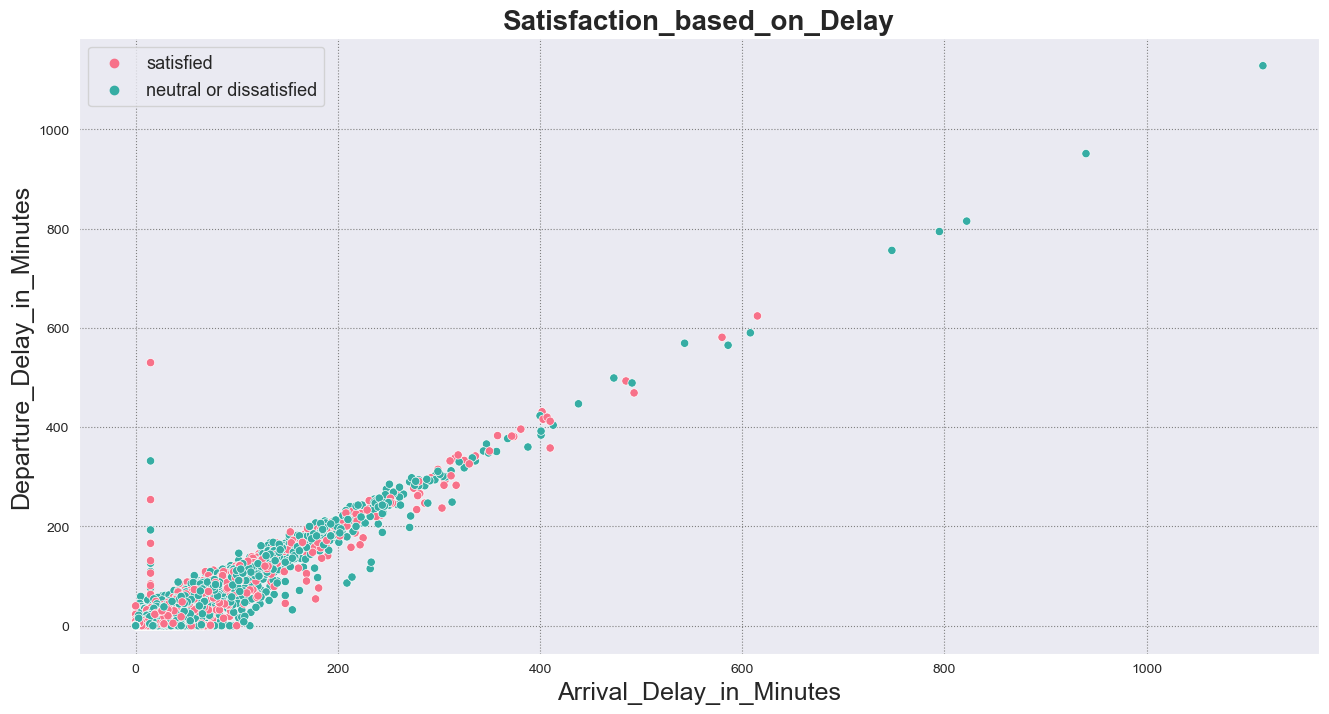

In [ ]:
# menggunakan seaborn untuk memilih setting figure
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# figsize mengatur ukuran figure
plt.figure(figsize=(16,8))
# title untuk memberi judul serta ukuran dan fontnya
plt.title('Satisfaction_based_on_Delay',size=20,fontweight='bold')
# membuat scatterplot dengan y= departure dan x=arrival, hue memplot satisfaction dan palette memberi warna
sns.scatterplot(y='Departure_Delay_in_Minutes',data=df,x='Arrival_Delay_in_Minutes',hue='satisfaction',palette='husl')
# memberi label x arrival dan label y departure
plt.xlabel('Arrival_Delay_in_Minutes',size=18)
plt.ylabel('Departure_Delay_in_Minutes',size=18)
# membuat kotak legend di atas kiri
plt.legend(fontsize='13')
plt.show() # menampilkan scatterplot/chart

Dari scatterplot diatas terlihat warna hijau yang mewakilkan Neutral or Dissatisfied lebih terlihat dan menyebar di antara 0-400 minutes sementara status satisfied banyak di 100-200 menit. Yang berarti waktu delay rata-rata berkisar 200 menit dan pada rentang waktu delay ini status satisfaction passengers masih terbagi 2, beberapa menyatakan dissatisfied dan mungkin beberapa passengers masih mentoleransi delay. 

Kemudian titik semakin jarang ke arah 600-800 minutes keatas yang berarti jarang sekali waktu delay sampai melebihi 400 menit. Dan ada beberapa titik berwarna merah yang mewakilkan satisifed di sekitar 600 menit yang kemungkinan adalah outlier karena tidak mungkin passengers merasa satisfied jika delay terjadi apalagi sampai 600 menit. Dapat disimpulkan bahwa semakin lama waktu Delay, sudah sewajarnya penumpang akan lebih cenderung Neutral or Dissatisfied.

# Analisa deskriptif dari In Flight Service 


In-flight service atau layanan pada saat penumpang berada di dalam pesawat juga mempengaruhi skor kepuasan penumpang, oleh karena itu perlu mengetahui nilai skor yang penumpang berikan pada service ini. Penting juga untuk membaca sebaran data untuk bisa melihat rating berapa yang penumpang biasa berikan. Maka dari itu kita akan melihat analisa deskriptif dan distribusi dari skor in flight service terhadap maskapai.

In [ ]:
# Mengambil values dan counts untuk dictionary dan menggabungkan nya di value_dict menggunakan dict(zip)
values = df['Inflight_service'].value_counts(dropna=False).keys().tolist()
counts = df['Inflight_service'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))
for i in value_dict: # membuat statement for i di dalam value_dict 
    print(f'Jumlah yang memberi Rating {i}: {value_dict[i]} Passengers') # menampilkan rating i untuk setiap rating passengers

Jumlah yang memberi Rating 4: 9378 Passengers
Jumlah yang memberi Rating 5: 6950 Passengers
Jumlah yang memberi Rating 3: 5017 Passengers
Jumlah yang memberi Rating 2: 2851 Passengers
Jumlah yang memberi Rating 1: 1778 Passengers
Jumlah yang memberi Rating 0: 2 Passengers


Pada data diatas kita bisa mengetahui berapa passengers yang memberi skor tertentu. Selanjutnya akan menghitung beberapa analisa deskriptif.

Mean Inflight_service: 3.649253156760086
Median Inflight_service: 4.0
Standard Deviation Inflight_service: 1.1806809589809695
Skewness Inflight_service: -0.696802643973287
Kurtosis Inflight_service: -0.3608397890858006


<Axes: >

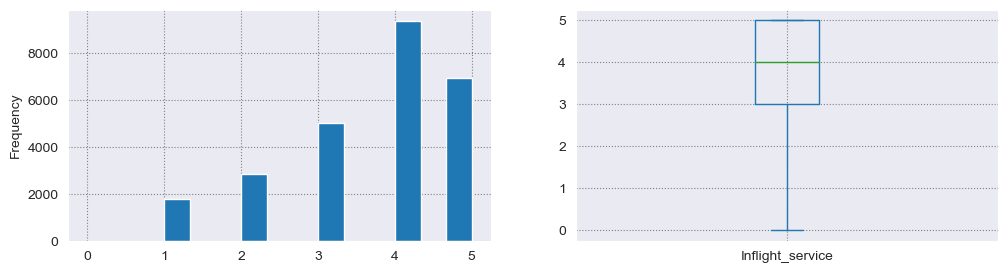

In [ ]:
# Menampilkan beberapa analisa deskriptif
print('Mean Inflight_service:',df['Inflight_service'].mean())
print('Median Inflight_service:',df['Inflight_service'].median())
print('Standard Deviation Inflight_service:',df['Inflight_service'].std())
print('Skewness Inflight_service:',df['Inflight_service'].skew())
print('Kurtosis Inflight_service:',df['Inflight_service'].kurtosis())

# Membuat bar chart dan box plot
fig, ax = plt.subplots(ncols=2,figsize=(12,3))

df['Inflight_service'].plot(kind='hist',bins=15,ax=ax[0])
df['Inflight_service'].plot(kind='box',ax=ax[1])

Pada analisis deskriptif ini saya menyimpulkan bahwa:
- Skor rata-rata/mean yang diberikan kepada layanan in-flight service ini adalah 3.6 dimana lebih kecil dari median dengan skor 4 yang berarti data negative skewed. dilihat juga whisker dari box plot lebih panjang dibawah dimana yang berarti ada bebarapa data diluar dari nilai mean 3.6. 
- Nilai median atau garis tengah box terdapat pada angka 4 dan box lebih cenderung ke atas yang berarti sebaran data cenderung ke nilai lebih besar. 
- Kemudian nilai standar deviasi 1.1 lebih kecil dari mean yang berarti sebagian besar data lebih terkumpul di area mean atau skor 4.
- Skewness dengan nilai -0.69 yaitu left skewed atau distribusi memiliki ekor lebih panjang kekiri, yang mewakili sebagian kecil penumpang memberi nilai skor rendah atau 1,2 dan 3.
- Kurtosis dengan nilai -0.36 kemungkinan adalah distribusi leptokurtik dimana distribusi data mempunyai puncak yang tinggi yaitu diskor 4


**Analisa Deskriptif Corelation antara Inflight_service dan Checkin_service menggunakan metode Pearson**

In [ ]:
# menghitung corelation dengan metode pearson
correlation_coefficient, p_value = stats.pearsonr(df['Checkin_service'], df['Inflight_service'])

# menampilkan perhitungan pearson dan p-value
print("pearson correlation values:", correlation_coefficient)
print("p-value:", p_value)

pearson correlation values: 0.23917020325142116
p-value: 0.0


c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


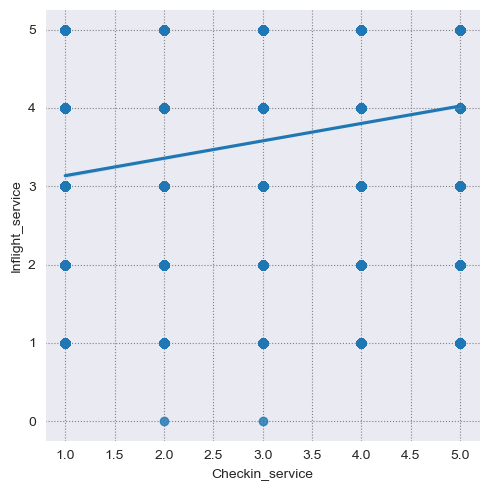

In [ ]:
sns.lmplot(data=df,x='Checkin_service', y='Inflight_service')

Jika dilihat dari pearson correlation nilai nya hanya 0.23 ini bisa diabaikan dan dari p-value = 0.0 berarti tidak ada hubungan linear antara inflight_service dan checkin_service. Bisa disimpulkan tidak ada korelasi antara Inflight_service dan Checkin_Service

**Analisis Inferensial antara Class dan Satisfaction menggunakan Hipotesis Chi-Square**

Analisa Inferensial akan saya lakukan dengan menggunakan Hipotesis Chi-Square Test dimana akan membandingkan hubungan antara Tingkat Class penumpang dengan hasil dari kepuasannya. Hipotesis akan dijelaskan sebagai berikut:  
 
H0 = Tidak ada hubungan Class dengan satisfaction  
H1 = Ada hubungan Class dengan satisfaction

In [ ]:
# Membuat Contingency Table dari Class dan satisfaction
contingency_table = pd.crosstab(df['Class'],df['satisfaction'])
contingency_table

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,3809,8686
Eco,9322,2242
Eco Plus,1442,475


In [ ]:
# Menggunakan stats.chi2_ untuk menghitung p-value dengann methode chi-square
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


critical value = 0.05  
p-val = 0 < 0.05  

Berarti H0 ditolak dan H1 diterima yaitu Ada hubungan antara Level Class dengan Satisfaction. Dari Contingency_table juga dapat dilihat Business Class status satisifed lebih besar yaitu 8686 dibanding dissatisfied hanya 3809. Dilanjutkan dengan Eco Class jumlah dissatisfied sebanyak 9322 dan satisfied hanya 2242 yang makin memperjelas bahwa Class sangat mempengaruhi satisfaction dari penumpang.

**Conclusion**

Kesimpulan yang didapat setelah melakukan analisa data akan saya tuliskan dalam bentuk insight:

- Insight dari usia penumpang maskapai:   
Rentang usia yang mendominasi jumlah penumpang adalah 20-50 tahun, Kondisi ini dapat dianggap wajar karena usia 20-50 tahun masuk ke dalam kategori usia produktif, di mana banyak orang melakukan perjalanan untuk berbagai keperluan seperti pekerjaan dan liburan. Kemudian rentang tertinggi dikisaran 20-30 tahun dan terkecil ada pada 0-10 tahun dan 70-80 tahun. Jika ingin meraih target usia yang rentang terkecil tersebut, maskapai mungkin bisa memberi promo harga seperti diskon harga tiket untuk anak dibawah 10 tahun dan manula. Insight ini bisa memberikan pemahaman agar menjadi dasar untuk merancang strategi yang sesuai dengan profil usia penumpang.

- Insight dari distribusi kepuasan maskapai:   
Persentase distribusi menunjukkan bahwa 56.1% penumpang cenderung netral atau tidak puas, sedangkan 43.9% menyatakan puas dengan layanan maskapai. Secara garis besar sebagian besar pengguna pesawat masih cenderung tidak puas dengan pelayanan maskapai. Dimana ini bisa jadi acuan oleh maskapai agar memperbaiki pelayanan yang mereka berikan.

- Insight dari faktor Gender pengguna maskapai:
Perbedaan antara jumlah penumpang perempuan dan laki-laki tidak terlalu signifikan, menunjukkan bahwa maskapai ini memiliki distribusi penumpang yang cenderung seimbang dari segi gender. Keseimbangan ini bisa berarti positif karena maskapai memiliki daya tarik dan penerimaan yang baik dari kedua gender tersebut. Berarti maskapai tidak perlu khawatir tentang masalah gender dan bisa lebih fokus ke peningkatan layanan atau faktor lain yang memengaruhi pengalaman terbang penumpang.

- Insight dari faktor Cleanliness 
Kesimpulan menunjukkan penumpang pesawat sudah cukup puas dengan tingkat kebersihan dimana sebagian besar penumpang memberi skor yang tinggi (3-5) meskipun begitu ada juga beberapa penumpang yang tidak puas karena memberi skor rendah(1-2). Walaupun secara garis besar sudah mempunyai kesan positif tetapi saran dari penumpang tetap diperlukan agar kedepannya maskapai dapat meningkatkan kebersihan dalam pesawat seperti kebersihan toilet, kursi dan lainnya.

- Insight dari distribusi kepuasan penumpang terhadap Arrival_delay dan Departure_delay
Gambaran dari scatterplot menunjukkan bahwa waktu delay rata-rata mencapai 200 menit yang mana beberapa penumpang terbagi dua. Beberapa masih bisa mentolerir dengan skor satisfied dan lainnya dissatisfied. Dari data ini maskapai bisa merancang strategi untuk mengelola waktu delay agar berada di batas toleransi penumpang, atau jika delay tidak terhindarkan maskapai bisa memberi kompensasi berupa uang atau penginapan sehingga tingkat kepuasan penumpang bisa tetap terjaga.

- Insight dari In-flight Service
Layanan In-flight Service ternyata sudah cukup baik dikarenakan mayoritas penumpang memberi skor yang tinggi terhadap layanan ini, hanya sebagian kecil yang memberi skor rendah. Kedepannya maskapai mungkin bisa lebih fokus ke kelompok penumpang yang memberi skor rendah dengan cara memberi questionaire atas layanan inflight-service sehingga maskapai memahami aspek apa yang membuat penumpang memberi skor rendah.

- Insight dari korelasi In-flight Service dan Checkin_Service
Setelah analisis dilakukan dengan hasil korelasi yang rendah dapat disimpulkan bahwa tidak ada korelasi linear antara In-flight service dan Checkin service, meskipun begitu mungkin terdapat hubungan nonlinear yang mempengaruhi 2 variable tersebut. Kedepannya bisa dilakukan analisis mendalam terhadap faktor-faktor lain yang mungkin mempengaruhi variable ini.

- Insight dari hipotesis hubungan Class dan Satisfaction
Dari hipotesis didapat tingkat Class sangat mempengaruhi tingkat kepuasan penumpang. Business class cenderung memiliki tingkat kepuasan yang tinggi, sementara economy class lebih cenderung tidak puas dengan layanan. Insight ini dapat menjadi acuan bagi maskapai untuk membuat strategi yang berbeda pada setiap class. Terlebih lagi meningkatkan layanan pada faktor yang dapat meningkat kepuasan di economy class agar secara keseluruhan skor kepuasan akan meningkat. 

Dari beberapa insight yang didapat semoga client dari perusahaan maskapai penerbangan bisa mendapatkan pemahaman dari analisa ini. Disarankan maskapai mempersiapkan strategi berdasarkan insight-insight ini agar bisa menaikan skor kepuasan penumpang dan juga meningkatkan pelayanan maskapai.